# Smokers and Drinkers

In [4]:
# imports 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [5]:
# Printing summary of data to look at how many 
df_comp = pd.read_csv('smoking_driking_dataset_Ver01.csv')
print(df_comp.info(),df_comp.describe(),sep="\n\n")


# columns which contains missing values
df_comp.isnull().sum()

# getting all the numerical columns 
num_cols = [ 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  int64  
 8   hear_right        991346 non-null  int64  
 9   SBP               991346 non-null  int64  
 10  DBP               991346 non-null  int64  
 11  BLDS              991346 non-null  int64  
 12  tot_chole         991346 non-null  int64  
 13  HDL_chole         991346 non-null  int64  
 14  LDL_chole         991346 non-null  int64  
 15  triglyceride      991346 non-null  int64  
 16  hemoglobin        99

### Data overview
1. there are 5 columns of type float64, 17 columns of type int64, and 2 object columns.<br>
2. The DataFrame can't detect any null values which implies there are no missing values. However outliers are present in the data indicated by difference in max and 75 percentile values and min adn 25 percentile values<br>
3. The Data isn't normalized and features' means and standard deviations differ a lot, necessitating normalization of the data. Also, we will have to convert the categorical columns to their numerical representation for easier processing using one-hot encoding or label-encoding.
4. The variable to be predicted is DRK_YN (binary classification).

C:\Users\vishn\AppData\Local\Temp\ipykernel_13692\600299594.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(round(len(num_cols)/2), 2, sub_pl)  # row 1, column 2, count


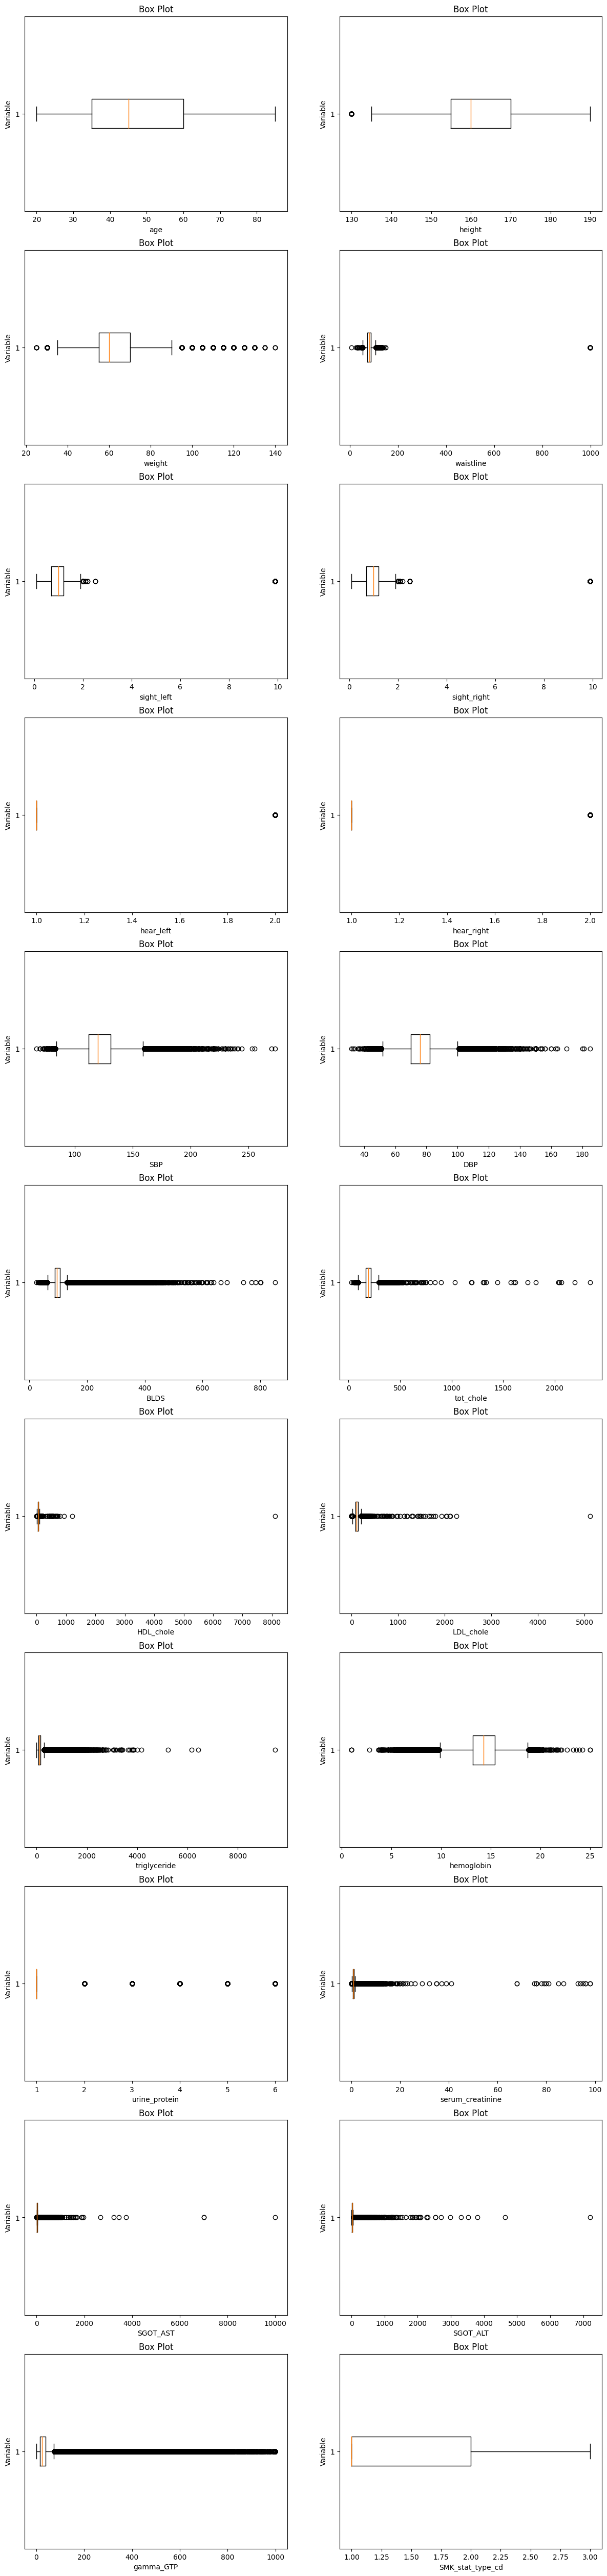

Percentage of outliers using the box plot / IQR method
age                 0.000000
height              0.008675
weight              1.938879
waistline           0.445556
sight_left          1.168311
sight_right         1.058662
hear_left           3.149455
hear_right          3.047574
SBP                 1.597424
DBP                 1.323655
BLDS                6.476245
tot_chole           1.139663
HDL_chole           1.397897
LDL_chole           1.018615
triglyceride        5.457630
hemoglobin          0.984520
urine_protein       5.666135
serum_creatinine    0.807488
SGOT_AST            6.820424
SGOT_ALT            7.356463
gamma_GTP           9.496382
SMK_stat_type_cd    0.000000
dtype: float64
Percentage of outliers using the standard deviation method
age                 0.000000
height              0.008675
weight              0.461998
waistline           0.064357
sight_left          0.314522
sight_right         0.313816
hear_left           3.149455
hear_right          3.047574
S

In [6]:

sub_pl = 1
# visualizing outliers c
plt.subplots(figsize=(12,50))
plt.tight_layout()
for column in num_cols:
    plt.subplot(round(len(num_cols)/2), 2, sub_pl)  # row 1, column 2, count  
    plt.boxplot(df_comp[column], vert=False)
    plt.ylabel('Variable')
    plt.xlabel(column)
    plt.title('Box Plot')
    sub_pl += 1
plt.show()


# calculating the percentage of each column that are classified the number of outliers for each column
print("Percentage of outliers using the box plot / IQR method")
Q1 = df_comp[num_cols].quantile(0.25)
Q3 = df_comp[num_cols].quantile(0.75)
IQR = Q3 - Q1
print(((df_comp[num_cols] < (Q1 - 1.5 * IQR)) | (df_comp[num_cols] > (Q3 + 1.5 * IQR))).sum()/len(df_comp)*100)

print("Percentage of outliers using the standard deviation method")
mean = df_comp[num_cols].mean()
std = df_comp[num_cols].std()
print(((df_comp[num_cols] < -3*std + mean) | (df_comp[num_cols] > 3*std + mean)).sum()/len(df_comp)*100)


Our data consists of many outliers as shown in the box plot, there are 2 ways to remove outliers using namely:-

1. using IQR (Interquartile range)
2. using Standard deviations

We now move onto removing the outliers

our rows were reduced by 15%


C:\Users\vishn\AppData\Local\Temp\ipykernel_13692\3943457042.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


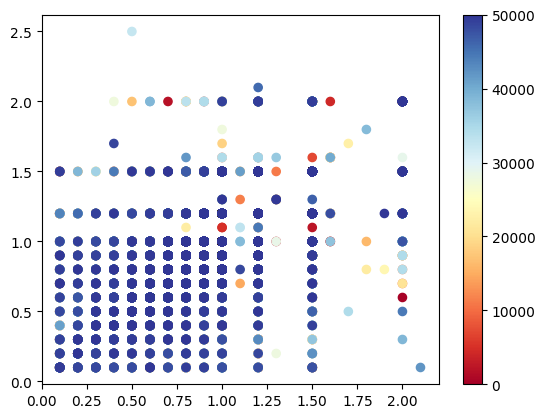

C:\Users\vishn\AppData\Local\Temp\ipykernel_13692\3943457042.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


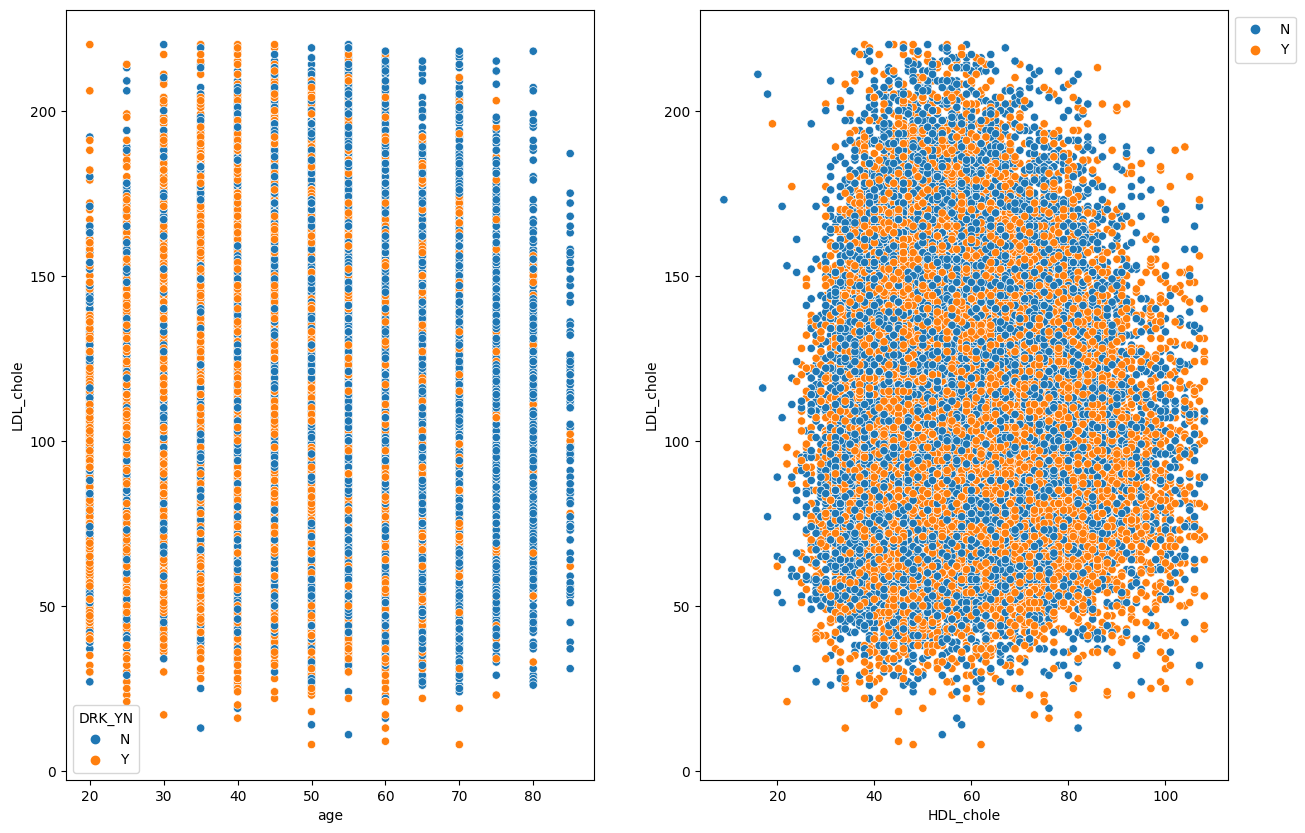

In [7]:
# defining boolean masks
IQR_MASK = lambda x : ((x[num_cols] >= (Q1 - 1.5 * IQR)) & (x[num_cols] <= (Q3 + 1.5 * IQR)))
STD_MASK = lambda x : (x[num_cols] >= -3*std + mean) & (x[num_cols] <= 3*std + mean)

# change this line to use the mask of your choice
df_comp2 = df_comp[STD_MASK(df_comp).all(axis=1)]

print(f"our rows were reduced by {round((1-len(df_comp2)/len(df_comp))*100)}%")

# Let's try to gain some insight about the data
# comparing sight_left , sight_right
cm = plt.cm.get_cmap('RdYlBu')
n = 50000
z = range(n)
df_sample = df_comp2.sample(n)

sc = plt.scatter(df_sample['sight_left'], df_sample['sight_right'], c=z, vmin=0, vmax=n, s=35, cmap=cm)
plt.colorbar(sc)
plt.show()
# not weak correlation b/w sight_left and sight_right
# looking at age and ldl_chole
plt.subplots(figsize=(15,10))
plt.subplot(1,2,1)
sns.scatterplot( x="age", y='LDL_chole', data=df_sample,
                hue='DRK_YN')
plt.subplot(1,2,2)
sns.scatterplot( x="HDL_chole", y='LDL_chole', data=df_sample,
                hue='DRK_YN')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

sns.set_style('darkgrid')
 
# # plot the graph using the default estimator mean
# sns.barplot(x ='age', y ='DRK_YN', data =df_sample, palette ='plasma')
 
# # sns.scatterplot( x="age", y='triglyceride', data=df_sample,
# #                 hue='DRK_YN')
# plt.show()

In [8]:
# hear_left, hear_right only contains 1.0 hence both columns can be discarded (they don't encode any information)
# here we should drop duplicates
print(df_comp2.shape)
df_comp3 = df_comp2.drop(['hear_right','hear_left'],axis=1).drop_duplicates()
print(df_comp3.shape)


(846398, 24)
(846379, 22)


# Normalization and Categorical Data

In [9]:
# First we will use label encoding to encode our categorical columns
# Since both the columns are binary this method will suffice

df_comp3[['sex', 'DRK_YN']] = df_comp3[['sex', 'DRK_YN']].apply(LabelEncoder().fit_transform)


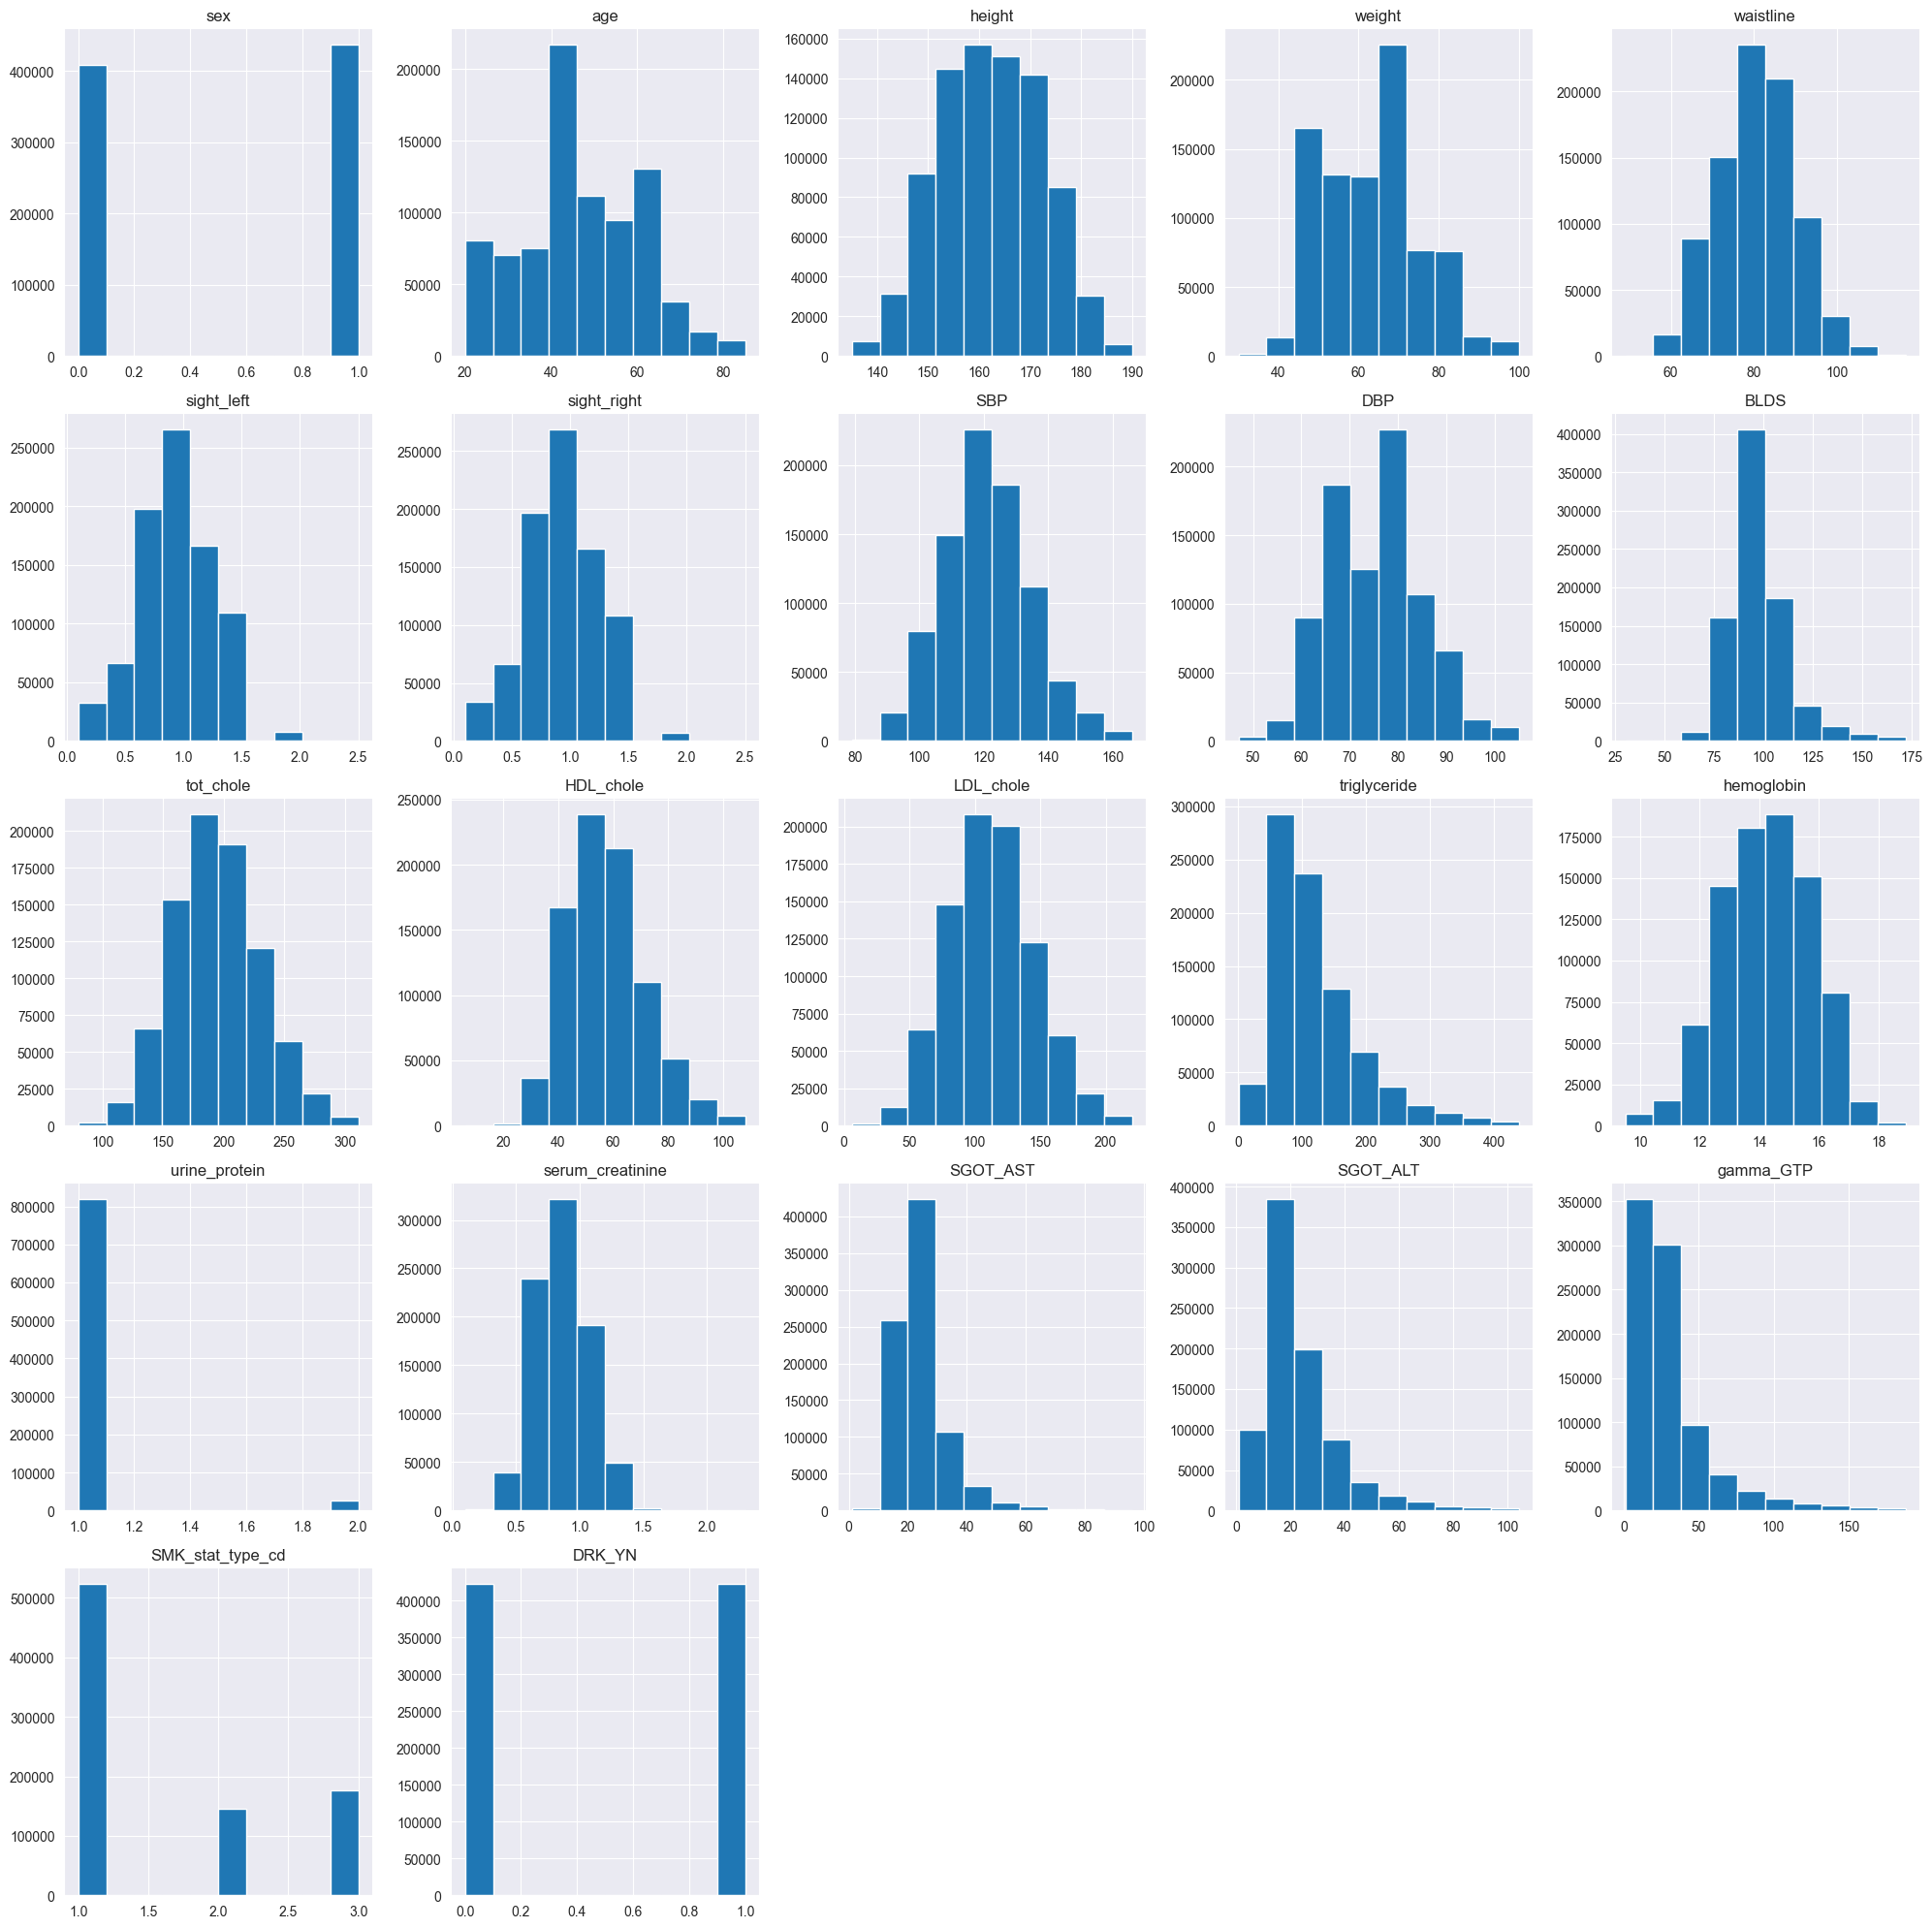

"\n'age', , 'triglyceride', 'hemoglobin', 'SGOT_AST', 'SGOT_ALT',\n       'gamma_GTP'\n"

In [10]:
# Let's find the distribution of the columns in our dataset
df_comp3.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

"""
'age', , 'triglyceride', 'hemoglobin', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP'
"""

#### Accoring to the distributions 
1. *`['sex','DRK_YN','urine_protein','SMK_stat_type_cd']`* - **These all are in smaller ranges with discrete distributions hence there is no need to normalize them**
2. *`['height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',,'serum_creatine']`* - **These are normally distributed and just need to be standardized**
3. *`['age', 'triglyceride', 'hemoglobin', 'SGOT_AST', 'SGOT_ALT','gamma_GTP']`* **Since these have unique distribution we will use MinMaxScaler to preserve there original**

In [11]:
norm_cols = ['height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole','serum_creatinine']
min_max_cols = ['age', 'triglyceride', 'hemoglobin', 'SGOT_AST', 'SGOT_ALT','gamma_GTP']

s_scaler = StandardScaler().fit(df_comp3[norm_cols])
df_comp3[norm_cols] = s_scaler.transform(df_comp3[norm_cols])

mm_scaler = MinMaxScaler().fit(df_comp3[min_max_cols])
df_comp3[min_max_cols] = mm_scaler.transform(df_comp3[min_max_cols])
print(df_comp3.columns)
df_comp3.head()


Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
       'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP',
       'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')


,sex,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,0.230769,0.837772,1.014236,1.012933,0.102687,0.110779,-0.096877,0.485687,0.110820,...,0.397477,0.208238,0.808511,1,0.779992,0.210526,0.330097,0.208556,1,1
1,1,0.153846,1.925297,1.431331,0.905612,-0.192332,0.703596,0.638640,0.700045,0.576390,...,1.067824,0.274600,0.670213,1,0.272067,0.200000,0.339806,0.139037,3,0
2,1,0.307692,0.294009,1.014236,1.120255,0.692726,1.592821,-0.096877,-0.586108,0.044310,...,-1.186980,0.235698,0.670213,1,0.272067,0.484211,0.300971,0.358289,1,0
3,1,0.461538,1.381535,1.431331,1.120255,1.577785,0.703596,1.741916,1.235943,-0.155219,...,-0.272870,0.240275,0.861702,1,1.287916,0.294737,0.320388,0.090909,1,0
4,1,0.461538,0.294009,-0.237048,-0.060278,0.102687,0.703596,1.227054,0.700045,0.243840,...,0.123244,0.235698,0.457447,1,-0.235858,0.189474,0.106796,0.128342,1,0


# Machine Learning

**First we will divide our data set into 2 categories training data and test data.** <br>
**Then we will move onto training different ML models and measuring their accuracy on the test set.**

In [12]:
X = df_comp3[['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
         'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
       'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP',
       'SMK_stat_type_cd']]
Y = df_comp3["DRK_YN"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                   random_state=12, 
                                   test_size=0.25, 
                                   shuffle=True)

print(*[x.shape for x in (X_train, X_test, Y_train, Y_test)])

(634784, 21) (211595, 21) (634784,) (211595,)


In [13]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

def evaluate(model,time,y_pred):

    f1 = f1_score(y_pred, Y_test, average="weighted")
    print(f"ACCURACY OF THE MODEL: ", accuracy_score(Y_test, y_pred),f'\nF1-SCORE: {f1}')
    print("TIME ELAPSED: " , time)
    labels = [0,1]
    cm = confusion_matrix(Y_test, y_pred, labels=labels)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
   



## Random Forest
*STATS*<br>
**ACCURACY OF THE MODEL:  0.720574682766606**<br> 
**F1-SCORE :0.720607521502301**<br>
**TIME ELAPSED:  108.6018168926239**<br>

##### Pros
1. Satisfactory accuracy.
2. Less chances of overfitting due to aggregating the result of several different trees.
3. Handles outliers well

##### Cons 
1. Computationally Expensive - time and resource consuming 
2. Hyperparameter tuning - challenging to tune hyperparameter finding optimal tree size took me 30 minutes

ACCURACY OF THE MODEL:  0.720574682766606 
F1-SCORE :0.720607521502301
TIME ELAPSED:  108.6018168926239


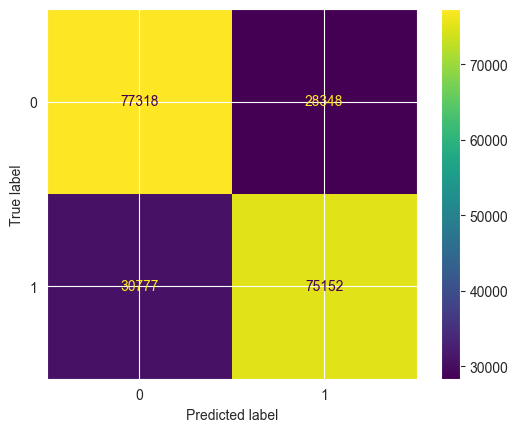

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# n = [5,10,25,40,60,100]
# for i in n:
#     clf = RandomForestClassifier(n_estimators = i)  

#     start = time.time()
#     # Model training
#     clf.fit(X_train, Y_train)
#     end = time.time()
#     t = end - start

#     y_pred = clf.predict(X_test)
#     # using metrics module for accuracy calculation
#     evaluate(clf, t, y_pred)
# OUTPUT
# ACCURACY OF THE MODEL WITH:  0.6847468040360122 
# F1-SCORE :0.6847482877346054
# TIME ELAPSED:  35.806562423706055
# ACCURACY OF THE MODEL WITH:  0.6988208606063471 
# F1-SCORE :0.6997012398125088
# TIME ELAPSED:  74.23218560218811
# ACCURACY OF THE MODEL WITH:  0.7169876414849122 
# F1-SCORE :0.7169954545966178
# TIME ELAPSED:  120.42120409011841
# ACCURACY OF THE MODEL WITH:  0.7205841347857936 
# F1-SCORE :0.7206138382880072
# TIME ELAPSED:  125.79476141929626
# ACCURACY OF THE MODEL WITH:  0.7233393983789788 
# F1-SCORE :0.7233488006789415
# TIME ELAPSED:  171.8665256500244

# optimal number of trees are 40

clf = RandomForestClassifier(n_estimators = 40)  

start = time.time()
# Model training
clf.fit(X_train, Y_train)
end = time.time()
t = end - start

y_pred = clf.predict(X_test)
# using metrics module for accuracy calculation
evaluate(clf, t, y_pred)

## Gaussian Naive Bayes
*STATS*<br>
**ACCURACY OF THE MODEL WITH:  0.6897327441574707**<br> 
**F1-SCORE :0.6899226857919728**<br>
**TIME ELAPSED:  0.8413839340209961**<br>

##### Pros
1. Fast training and prediction time
2. Good for categorical Data
3. Handles irrelevant features well (each feature's probability dependence is calculated independently)

##### Cons 
1. Assume features are normally distributed otherwise performance maybe affected (it was in our case)
2. Sensitive to data imbalance
3. Assumes features are independent

ACCURACY OF THE MODEL:  0.6897327441574707 
F1-SCORE: 0.6899226857919728
TIME ELAPSED:  0.5982608795166016
[[75524 30142]
 [35509 70420]]


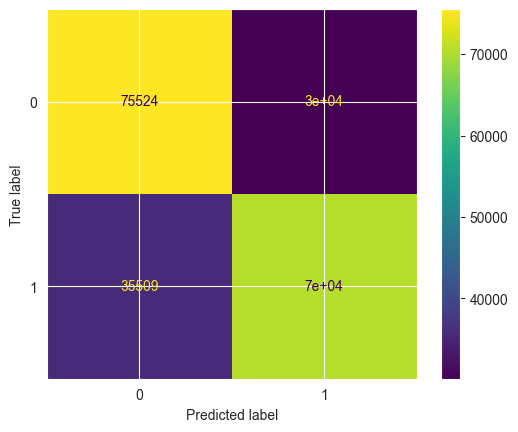

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

start = time.time()
# Model training
gnb.fit(X_train, Y_train)
end = time.time()
t = end - start

y_pred = gnb.predict(X_test)
# using metrics module for accuracy calculation
evaluate(gnb, t, y_pred)


## Logistic Regression 
*STATS*<br>
**ACCURACY OF THE MODEL:  0.7225454287672204**<br>
**F1-SCORE :0.7225830875365463**<br>
**TIME ELAPSED:  10.953835487365723**<br>


##### Pros
1. Efficient training time even for large databases 
2. Noise and outliers are handled well
3. Suitable for binary classification
4. Best accuracy up until now

##### Cons 
1. If class data is imabalance the model may perform worse
2. assumes linear relations which isn't the case most of the time
3. Doesn't do very good with complex relation

ACCURACY OF THE MODEL:  0.7225170727096576 
F1-SCORE :0.7225548578483829
TIME ELAPSED:  12.738398790359497


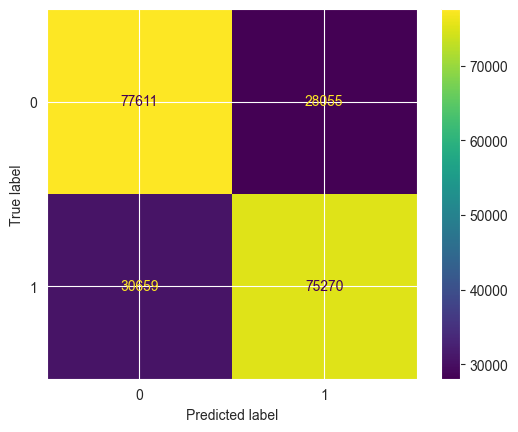

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0,max_iter=1000)
start = time.time()
log.fit(X_train, Y_train)
# Prediction
y_pred = log.predict(X_test)
t = time.time() - start
acc = accuracy_score(Y_test, y_pred)
evaluate(log,t,y_pred)

## K-Nearest Neighbors (KNN)

##### Pros 
1. Lazy Learning
2. No assumption about data

##### Cons
1. slow while predicting
2. Very high memory usage
3. Curse of dimensionality 
4. Not suitable for database with many features, hence I won't be evaluating KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    start = time.time()
    knn.fit(X_train, Y_train)
  
    training_score = knn.score(X_train, Y_train)
    test_score = knn.score(X_test, Y_test)
    print(f"time elapsed: {time.time()-start}")
    K.append(k)
    
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    print(k,scores[k])

## SVM
*STATS*<br>
LINEAR KERNEL<br>
**ACCURACY OF THE MODEL: 0.7181266097970179**<br>
**F1-SCORE: 0.7182730493979205**<br>
**TIME ELAPSED:  2.796931505203247**<br>

NON-LINEAR<br>
**ACCURACY OF THE MODEL: 0.7145206644769488**<br>
**F1-SCORE: 0.7145973298281242**<br>
**TIME ELAPSED: 233.84191918373108**<br>

##### Pros 
1. Effective in high dimensional spaces (71% accuracy with only 10% data used to train)
2. Less prone to overfitting 
3. Kernel can be changed to fit non linear data
##### Cons
1. Sensitive to outliers
2. Very slow and computationally extensive
3. Memory intensive

ACCURACY OF THE MODEL:  0.7181266097970179 
F1-SCORE :0.7182730493979205
TIME ELAPSED:  2.796931505203247


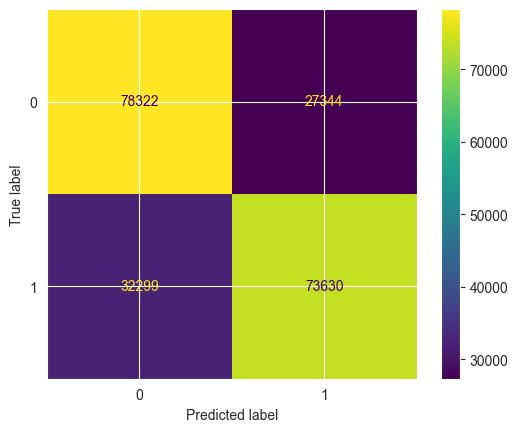

In [ ]:
#Import svm model
from sklearn import svm

# taking only 1% data to train svm because while trying to train the svm with full data it exceeded 250 min 
# SVMs perform really well on small datasets hence it shouldn't make a difference
svm_X_train = X_train.iloc[:len(X_train)//100]
svm_Y_train = Y_train.iloc[:len(X_train)//100]
sv = svm.SVC(kernel='linear') # Linear Kernel
start = time.time()
#Train the model using the training sets
sv.fit(svm_X_train, svm_Y_train)
t = time.time() - start
#Predict the response for test dataset
y_pred = sv.predict(X_test)

evaluate(sv,t,y_pred)

In [ ]:
sv = svm.SVC(gamma="auto") # Linear Kernel
# non linear kernels require more data 
svm_X_train = X_train.iloc[:len(X_train)//10]
svm_Y_train = Y_train.iloc[:len(X_train)//10]
start = time.time()
#Train the model using the training sets
sv.fit(svm_X_train, svm_Y_train)
t = time.time() - start
#Predict the response for test dataset
y_pred = sv.predict(X_test)

evaluate(sv,t,y_pred)

NameError: name 'svm' is not defined

# Choosen Model
### For this problem I would recommend Logistic Regression model as it has the highest accuracy as well as very resonable training and prediction time.
